LES IMPORTS

In [1]:

import pandas as pan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score, classification_report,cohen_kappa_score
from time import perf_counter as pf
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np



ANALYSE EXPLORATOIRE DES DONNEES

In [2]:
sante_etudiant= pan.read_csv("datasets/sante_etudiant/student_health_data.csv")

DECOUPAGE DES DONNEES EN APPRENTISSAGE ET TEST

In [3]:

features_names= ["Student_ID","Age","Heart_Rate","Blood_Pressure_Systolic",
"Blood_Pressure_Diastolic","Stress_Level_Self_Report","Study_Hours","Project_Hours"]
X_num= sante_etudiant[features_names] 
y_continu=sante_etudiant["Stress_Level_Biosensor"] 


#transformation des données textuelle en données num
txt= ["Physical_Activity","Sleep_Quality","Mood","Health_Risk_Level"]
encoder= OneHotEncoder(sparse_output=False) #A VOIR
X_encode_txt= encoder.fit_transform(sante_etudiant[txt]) #transformation en numerique

X_transform= np.hstack((X_num,X_encode_txt)) #assembler les deux colonnes: colonne txt tranforme et les colonnes numérique

#transformation de y en catégorie distincte
y= pan.cut(y_continu, bins=[0,4.5,8.5, float("inf")],labels= ["faible","moyen","élevée"]) 


X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.3, random_state=0) 

(-1.1838574621607612,
 1.1039932124838459,
 -1.163178753058419,
 1.1030039458000003)

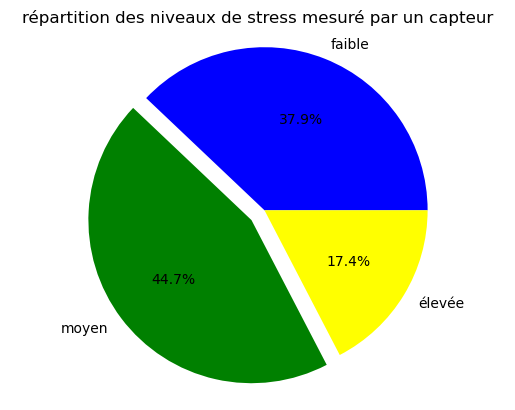

In [4]:




#sante_etudiant.describe()
# print("________________")
#sante_etudiant.info()


#graphique pour visualiser le repartition des niveau de stress dans notre variable cible: Stress Level Biosensor 
faible= 0
moyen= 0
eleve= 0
valeur=[]
pourcentage=[]
for elt in y:
    if elt == "faible":
       faible+=1
    if elt== "moyen":
        moyen+=1
    if elt== "élevée":
        eleve+= 1        
valeur.extend([369,435,169]) #somme de chaque niveau de stress

#calcul de pourcentage pour chaque niveau de stress
for val in valeur:
    pourcent= (val*100)/sum(valeur)
    pourcentage.append(pourcent)
#print(pourcentage)

label= ["faible","moyen","élevée"]
color= ["blue","green","yellow"]
explode= (0,0.1,0)

plt.pie(pourcentage, labels= label, colors=color, explode=explode, autopct="%1.1f%%")
plt.title("répartition des niveaux de stress mesuré par un capteur")
plt.axis("equal")
#plt.savefig("pie_chartLevelStress")
#plt.show()






TEST DES CLASSIFIEURS

In [12]:
#Perceptron

from sklearn.linear_model import Perceptron #  voir cmt ca fonctionne

t1 = pf() #temps 1

ppn = Perceptron(eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)

# On fait la somme de tous les cas où la valeur dans y_test est bien trouvée dans y_pred
print('Bonne classification: %d' % (y_test == y_pred).sum())
print('Erreurs: %d' % (y_test != y_pred).sum())

print ('\nAccuracy: %.2f\n' % accuracy_score(y_test, y_pred))

t2 = pf() #temps 2

print("\nLe temps d'exécution est de : ",t2 - t1,"secondes\n")

Bonne classification: 161
Erreurs: 139

Accuracy: 0.54


Le temps d'exécution est de :  0.01714369998080656 secondes



In [13]:
# test du classifieur RandomForest

from sklearn.ensemble import RandomForestClassifier

t1 = pf() #temps 1

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# On fait la somme de tous les cas où la valeur dans y_test est bien trouvée dans y_pred
print('Bonne classification: %d' % (y_test == y_pred).sum())
print('Erreurs: %d' % (y_test != y_pred).sum())

print ('\nAccuracy: %.2f\n' % accuracy_score(y_test, y_pred))

t2 = pf() #temps 2

print("\nLe temps d'exécution est de : ",t2 - t1,"secondes\n")

Bonne classification: 161
Erreurs: 139

Accuracy: 0.54


Le temps d'exécution est de :  0.5895246999862138 secondes



In [14]:
#test du classifieur LogisticRegression

from sklearn.linear_model import LogisticRegression

t1 = pf() #temps 1

lr = LogisticRegression(max_iter=1000)  # max_iter pour s'assurer que ça converge
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# On fait la somme de tous les cas où la valeur dans y_test est bien trouvée dans y_pred
print('Bonne classification: %d' % (y_test == y_pred).sum())
print('Erreurs: %d' % (y_test != y_pred).sum())

print ('\nAccuracy: %.2f\n' % accuracy_score(y_test, y_pred))

t2 = pf() #temps 2

print("\nLe temps d'exécution est de : ",t2 - t1,"secondes\n")

Bonne classification: 161
Erreurs: 139

Accuracy: 0.54


Le temps d'exécution est de :  0.024784700013697147 secondes



In [ ]:
#test du classifieur SVM

from sklearn import svm

t1 = pf() #temps 1

classification = svm.SVC(kernel="linear")
classification.fit(X_train, y_train)
y_pred = classification.predict(X_test)

# On fait la somme de tous les cas où la valeur dans y_test est bien trouvée dans y_pred
print('Bonne classification: %d' % (y_test == y_pred).sum())
print('Erreurs: %d' % (y_test != y_pred).sum())

print ('\nAccuracy: %.2f\n' % accuracy_score(y_test, y_pred))
print("Resultat de la classification avec tout les caractéristiques en variables explicatives et stress level biosensor en variable cible:\n", classification_report(y_test, y_pred))
print("kappa:", cohen_kappa_score(y_test,y_pred))
t2 = pf() #temps 2

print("\nLe temps d'exécution est de : ",t2 - t1,"secondes\n")



IMPORTANCE DES FEATURES POUR CHAQUE CLASSIFIEURS

In [26]:
#importance des features pr random forest
encode_text_features = encoder.get_feature_names_out(["Physical_Activity", "Sleep_Quality", "Mood", "Health_Risk_Level"]) #????
all_features= features_names + list( encoded_textual_features )
feature_important= pan.DataFrame({
    "feature": all_features,
    "importance":rf.feature_importances_
}).sort_values(by="importance", ascending=False)

print(feature_important)

                       feature  importance
5     Stress_Level_Self_Report    0.163754
18       Health_Risk_Level_Low    0.092645
3      Blood_Pressure_Systolic    0.090228
2                   Heart_Rate    0.087850
4     Blood_Pressure_Diastolic    0.087212
0                   Student_ID    0.086099
7                Project_Hours    0.085793
6                  Study_Hours    0.083017
1                          Age    0.047170
19  Health_Risk_Level_Moderate    0.037474
17      Health_Risk_Level_High    0.027258
13          Sleep_Quality_Poor    0.014182
11          Sleep_Quality_Good    0.014061
10  Physical_Activity_Moderate    0.013032
15                Mood_Neutral    0.012783
14                  Mood_Happy    0.012720
16               Mood_Stressed    0.012431
12      Sleep_Quality_Moderate    0.011372
9        Physical_Activity_Low    0.011100
8       Physical_Activity_High    0.009816


In [28]:
#importance des features pr perceptron
weights = ppn.coef_[0] 
encoded_textual_features = encoder.get_feature_names_out(["Physical_Activity", "Sleep_Quality", "Mood", "Health_Risk_Level"])
all_features= features_names + list( encoded_textual_features )
feature_important= pan.DataFrame({
    "feature": all_features,
    "importance":np.abs(weights)
}).sort_values(by="importance", ascending=False)

print(feature_important)


                       feature  importance
2                   Heart_Rate   99.243322
3      Blood_Pressure_Systolic   99.068059
0                   Student_ID   98.900000
4     Blood_Pressure_Diastolic   52.051172
18       Health_Risk_Level_Low   30.200000
5     Stress_Level_Self_Report   21.104388
19  Health_Risk_Level_Moderate   19.700000
1                          Age   14.600000
17      Health_Risk_Level_High   10.800000
7                Project_Hours   10.507659
10  Physical_Activity_Moderate    9.400000
9        Physical_Activity_Low    6.000000
8       Physical_Activity_High    3.700000
13          Sleep_Quality_Poor    3.100000
6                  Study_Hours    3.042643
16               Mood_Stressed    2.300000
12      Sleep_Quality_Moderate    1.600000
11          Sleep_Quality_Good    1.200000
14                  Mood_Happy    1.000000
15                Mood_Neutral    1.000000


In [37]:
#importance des features pr logisticRegression
weights = lr.coef_[0] 
encoded_textual_features = encoder.get_feature_names_out(["Physical_Activity", "Sleep_Quality", "Mood", "Health_Risk_Level"])
all_features= features_names + list( encoded_textual_features )
feature_important= pan.DataFrame({
    "feature": all_features,
    "importance": np.abs(weights)
}).sort_values(by="importance", ascending=False)

print(feature_important)

                       feature  importance
18       Health_Risk_Level_Low    2.174315
17      Health_Risk_Level_High    1.769461
19  Health_Risk_Level_Moderate    0.413063
5     Stress_Level_Self_Report    0.278110
16               Mood_Stressed    0.198246
14                  Mood_Happy    0.182884
13          Sleep_Quality_Poor    0.150745
11          Sleep_Quality_Good    0.120521
8       Physical_Activity_High    0.085164
10  Physical_Activity_Moderate    0.082060
12      Sleep_Quality_Moderate    0.038432
1                          Age    0.028624
2                   Heart_Rate    0.016693
9        Physical_Activity_Low    0.011313
7                Project_Hours    0.010952
6                  Study_Hours    0.010069
3      Blood_Pressure_Systolic    0.008450
4     Blood_Pressure_Diastolic    0.007897
15                Mood_Neutral    0.007154
0                   Student_ID    0.000201


In [38]:
#importance des features pr SVM
weights = classification.coef_[0] 
encoded_textual_features = encoder.get_feature_names_out(["Physical_Activity", "Sleep_Quality", "Mood", "Health_Risk_Level"])
all_features= features_names + list( encoded_textual_features )
feature_important= pan.DataFrame({
    "feature": all_features,
    "importance": np.abs(weights)
}).sort_values(by="importance", ascending=False)

print(feature_important)

                       feature  importance
18       Health_Risk_Level_Low    2.660976
17      Health_Risk_Level_High    2.071039
19  Health_Risk_Level_Moderate    0.589937
5     Stress_Level_Self_Report    0.372844
16               Mood_Stressed    0.216203
8       Physical_Activity_High    0.204236
9        Physical_Activity_Low    0.188676
13          Sleep_Quality_Poor    0.168237
14                  Mood_Happy    0.122988
15                Mood_Neutral    0.093215
12      Sleep_Quality_Moderate    0.093070
11          Sleep_Quality_Good    0.075166
2                   Heart_Rate    0.019352
10  Physical_Activity_Moderate    0.015560
1                          Age    0.015003
6                  Study_Hours    0.012469
4     Blood_Pressure_Diastolic    0.005613
3      Blood_Pressure_Systolic    0.005133
7                Project_Hours    0.001957
0                   Student_ID    0.000527


TENTATIVE D'AMELIORATION DES RESULTATS OBTENUS AVEC SVM

In [7]:


y_continu=sante_etudiant["Stress_Level_Biosensor"] 


#transformation des données textuelle en données num
stress_txt= ["Health_Risk_Level"]
encoder= OneHotEncoder(sparse_output=False) #A VOIR
X_encode_stress= encoder.fit_transform(sante_etudiant[stress_txt]) #transformation en numerique

y= pan.cut(y_continu, bins=[0,4.5,8.5, float("inf")],labels= ["faible","moyen","élevée"]) 

X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(X_encode_stress, y, test_size=0.3, random_state=0) 

In [11]:


from sklearn import svm

t1 = pf() #temps 1

classification = svm.SVC(kernel="linear")
classification.fit(X_trainSVM, y_trainSVM)
y_predSVM = classification.predict(X_testSVM)

# On fait la somme de tous les cas où la valeur dans y_test est bien trouvée dans y_pred
print('Bonne classification: %d' % (y_testSVM == y_predSVM).sum())
print('Erreurs: %d' % (y_testSVM != y_predSVM).sum())

print ('\nAccuracy: %.2f\n' % accuracy_score(y_testSVM, y_predSVM))
print("Resultat de la classification avec Health Risk Level en variable explicative et stress level biosensor en variable cible:\n", classification_report(y_testSVM, y_predSVM))
print("kappa:", cohen_kappa_score(y_testSVM,y_predSVM))
t2 = pf() #temps 2

print("\nLe temps d'exécution est de : ",t2 - t1,"secondes\n")



Bonne classification: 173
Erreurs: 127

Accuracy: 0.58

Resultat de la classification avec Health Risk Level en variable explicative et stress level biosensor en variable cible:
               precision    recall  f1-score   support

      faible       0.90      0.40      0.55       115
       moyen       0.51      0.96      0.67       132
      élevée       0.00      0.00      0.00        53

    accuracy                           0.58       300
   macro avg       0.47      0.45      0.41       300
weighted avg       0.57      0.58      0.51       300

kappa: 0.2568318801568261

Le temps d'exécution est de :  0.22475679987110198 secondes



C:\Users\amina\anaconda3REAL\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amina\anaconda3REAL\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amina\anaconda3REAL\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


POIDS DES FEATURES

In [16]:
#importance des features pr SVM
weights = classification.coef_[0] 
encoded_textual_features = encoder.get_feature_names_out(["Health_Risk_Level"])
all_features= list( encoded_textual_features )
feature_important= pan.DataFrame({
    "feature": all_features,
    "importance": np.abs(weights)
}).sort_values(by="importance", ascending=False)

print(feature_important)

                      feature  importance
1       Health_Risk_Level_Low    1.333008
0      Health_Risk_Level_High    0.666992
2  Health_Risk_Level_Moderate    0.666016


TENTATIVE AVEC D'AUTRES FEATURES

In [3]:

features_names= ["Heart_Rate","Stress_Level_Self_Report"]
X_num= sante_etudiant[features_names] 
y_continu=sante_etudiant["Stress_Level_Biosensor"] 


#transformation de y en catégorie distincte
y= pan.cut(y_continu, bins=[0,4.5,8.5, float("inf")],labels= ["faible","moyen","élevée"]) 


X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.3, random_state=0) 

In [12]:
from sklearn import svm

t1 = pf() #temps 1

classification = svm.SVC(kernel="linear")
classification.fit(X_train, y_train)
y_pred = classification.predict(X_test)

# On fait la somme de tous les cas où la valeur dans y_test est bien trouvée dans y_pred
print('Bonne classification: %d' % (y_test == y_pred).sum())
print('Erreurs: %d' % (y_test != y_pred).sum())

print ('\nAccuracy: %.2f\n' % accuracy_score(y_test, y_pred))
print("Resultat de la classification avec Heart Rate et Stress Level Report en variable explicatives et Stress Level Biosensor en variable cible :\n", classification_report(y_test, y_pred))
print("kappa:", cohen_kappa_score(y_test,y_pred))
t2 = pf() #temps 2

print("\nLe temps d'exécution est de : ",t2 - t1,"secondes\n")

Bonne classification: 132
Erreurs: 168

Accuracy: 0.44

Resultat de la classification avec Heart Rate et Stress Level Report en variable explicatives et Stress Level Biosensor en variable cible :
               precision    recall  f1-score   support

      faible       0.00      0.00      0.00       115
       moyen       0.44      1.00      0.61       132
      élevée       0.00      0.00      0.00        53

    accuracy                           0.44       300
   macro avg       0.15      0.33      0.20       300
weighted avg       0.19      0.44      0.27       300

kappa: 0.0

Le temps d'exécution est de :  5.042850000085309 secondes



C:\Users\amina\anaconda3REAL\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amina\anaconda3REAL\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amina\anaconda3REAL\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
#importance des features pr SVM
weights = classification.coef_[0] 
all_features= features_names 
feature_important= pan.DataFrame({
    "feature": all_features,
    "importance": np.abs(weights)
}).sort_values(by="importance", ascending=False)

print(feature_important)

                    feature  importance
1  Stress_Level_Self_Report    0.000504
0                Heart_Rate    0.000478


TENTATIVE D'AMELIORATION EN CHANGEANT LES INTERVALLES DE NIVEAUX DE STRESS

In [14]:
y_continu=sante_etudiant["Stress_Level_Biosensor"] 


#transformation des données textuelle en données num
stress_txt= ["Health_Risk_Level"]
encoder= OneHotEncoder(sparse_output=False) #A VOIR
X_encode_stress1= encoder.fit_transform(sante_etudiant[stress_txt]) #transformation en numerique

y2= pan.cut(y_continu, bins=[0,4.5,10,float("inf")],labels= ["faible_","élevée_","inconnu"],right=False) 

X_trainSVM1, X_testSVM1, y_trainSVM1, y_testSVM1 = train_test_split(X_encode_stress1, y2, test_size=0.3, random_state=0) 

In [17]:


from sklearn import svm

t1 = pf() #temps 1

classification = svm.SVC(kernel="linear")
classification.fit(X_trainSVM1, y_trainSVM1)
y_predSVM1 = classification.predict(X_testSVM1)

# On fait la somme de tous les cas où la valeur dans y_test est bien trouvée dans y_pred
print('Bonne classification: %d' % (y_testSVM1 == y_predSVM1).sum())
print('Erreurs: %d' % (y_testSVM1 != y_predSVM1).sum())

print ('\nAccuracy: %.2f\n' % accuracy_score(y_testSVM1, y_predSVM1))
print("Resultat de la classification après modification des niveaux de stress(variable explicative:Health Risk Level, variable cible: Stress Level Biosensor) :\n", classification_report(y_testSVM1, y_predSVM1))
print("kappa:", cohen_kappa_score(y_testSVM1,y_predSVM1))
t2 = pf() #temps 2

print("\nLe temps d'exécution est de : ",t2 - t1,"secondes\n")



Bonne classification: 226
Erreurs: 74

Accuracy: 0.75

Resultat de la classification après modification des niveaux de stress(variable explicative:Health Risk Level, variable cible: Stress Level Biosensor) :
               precision    recall  f1-score   support

     faible_       0.90      0.40      0.55       115
     élevée_       0.72      0.97      0.83       185

    accuracy                           0.75       300
   macro avg       0.81      0.69      0.69       300
weighted avg       0.79      0.75      0.72       300

kappa: 0.41686367218282117

Le temps d'exécution est de :  0.20468849991448224 secondes



Représentation graphique de nos niveaux de stress après changement

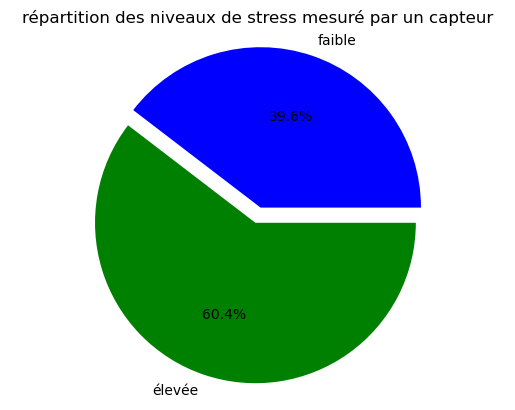

In [19]:
faible= 0
eleve= 0
inconnu=0
valeur=[]
pourcentage=[]
for elt in y2:
    if elt == "faible_":
       faible+=1
    if elt== "élevée_":
        eleve+=1
    if elt== "inconnu":
        inconnu+=1

valeur.extend([396,604]) #somme de chaque niveau de stress

#calcul de pourcentage pour chaque niveau de stress
for val in valeur:
    pourcent= (val*100)/sum(valeur)
    pourcentage.append(pourcent)
#print(pourcentage)

label= ["faible","élevée"]
color= ["blue","green"]
explode= (0,0.1)

plt.pie(pourcentage, labels= label, colors=color, explode=explode, autopct="%1.1f%%")
plt.title("répartition des niveaux de stress mesuré par un capteur")
plt.axis("equal")
plt.savefig("pie_chartLevelStress2")
plt.show()